## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:

1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?

2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.

3. Comprueba de manera estadística si la serie es o no stationary.

4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.

5. Divide en train y test. Guarda 20 muestras para test.


6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.

7. Representa en una gráfica los datos de test y tus predicciones.

8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess
warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

In [3]:
df = pd.read_csv('./data/AirPassengers.csv',  parse_dates=['date'],
                 index_col='date')
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='date'>

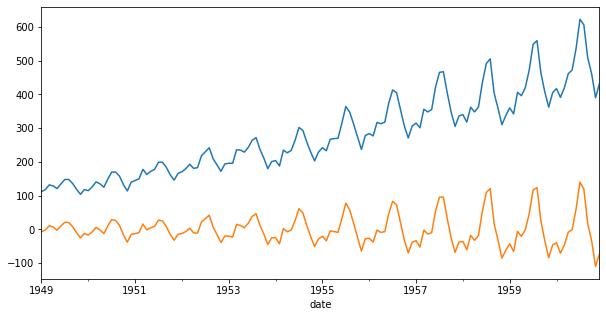

In [4]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
detrended = df.value.values - result_add.trend
df['value'].plot(figsize=(10,5))
detrended.plot(figsize=(10,5))

In [5]:
df_reconstructed = pd.concat([result_add.seasonal,
                             result_add.trend,
                             result_add.resid,
                             result_add.observed], axis=1)
df_reconstructed.head()

,seasonal,trend,resid,value
date,,,,
1949-01-01,-23.790261,118.588481,17.201780,112.0
1949-02-01,-33.871846,119.734169,32.137678,118.0
1949-03-01,-1.682598,120.879856,12.802742,132.0
1949-04-01,-7.340572,122.025544,14.315028,129.0
1949-05-01,-4.866602,123.171232,2.695370,121.0


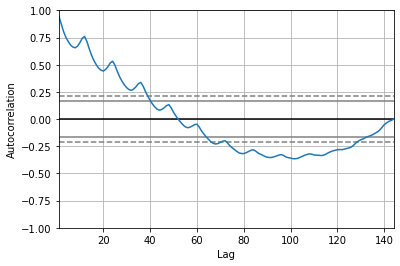

In [6]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['value'].tolist());

In [7]:
df['value'].autocorr()

0.9601946480498522

In [70]:
df_49_53 = df[df.index.year <1953]

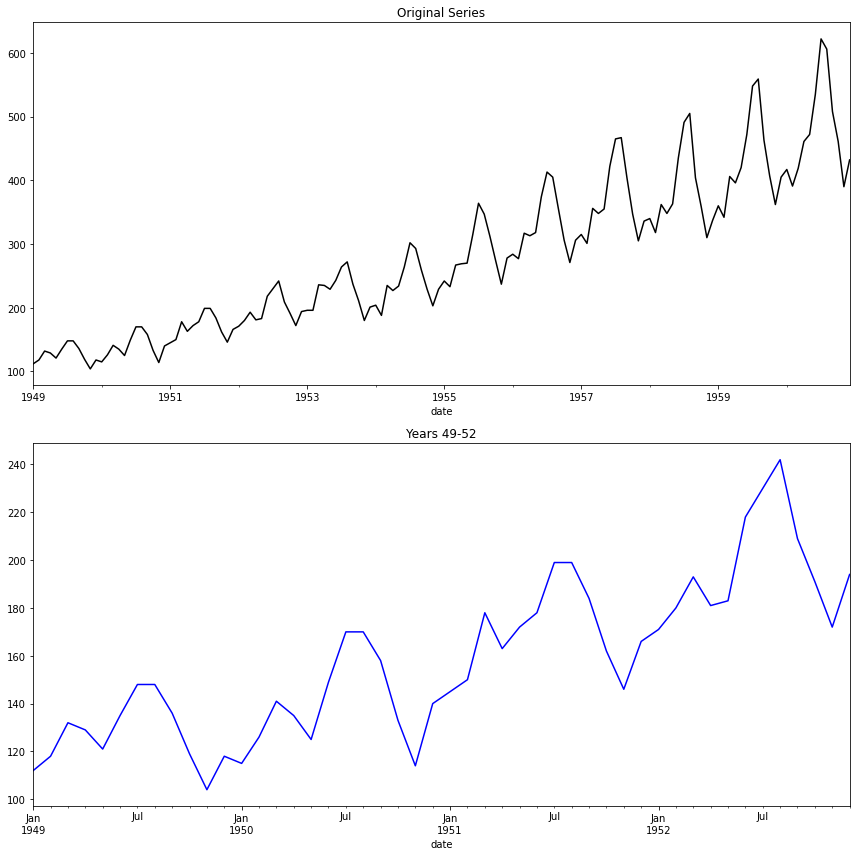

In [71]:

# Plot
fig, axes = plt.subplots(2,1, figsize=(12, 12))
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_49_53['value'].plot(ax=axes[1], color='b', title='Years 49-52')
plt.tight_layout()

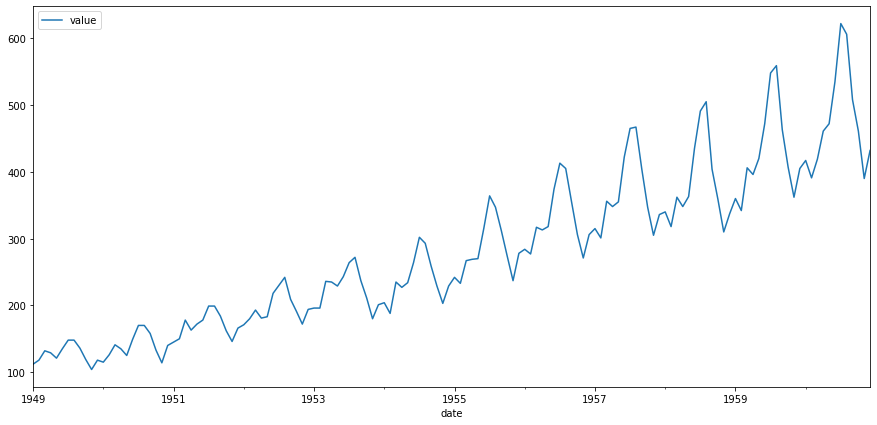

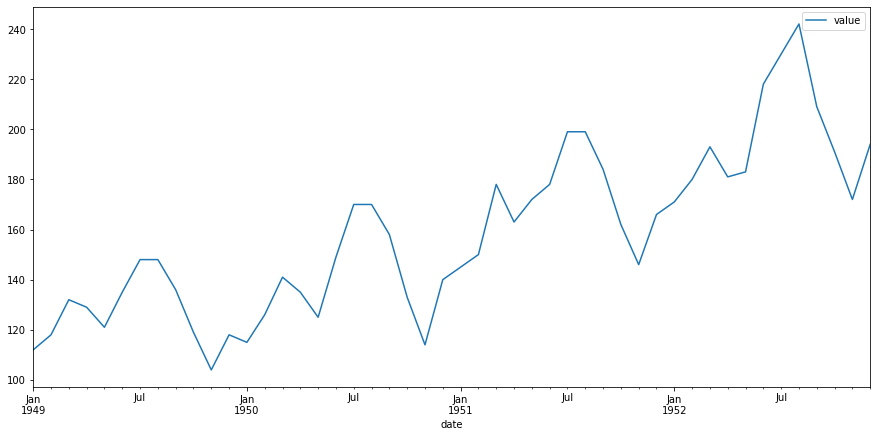

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior

In [81]:
df_ma = df['value'].rolling(3, center=True, closed='both').mean()
df_loess_sea = pd.DataFrame(lowess(df['value'], np.arange(len(df['value'])), frac=df['value'].autocorr())[:, 1], index=df.index, columns=['value'])
df_loess_sea

,value
date,
1949-01-01,106.635900
1949-02-01,108.821077
1949-03-01,111.007738
1949-04-01,113.195907
1949-05-01,115.385593
...,...
1960-08-01,436.833142
1960-09-01,439.381200
1960-10-01,441.930147


<AxesSubplot:xlabel='date'>

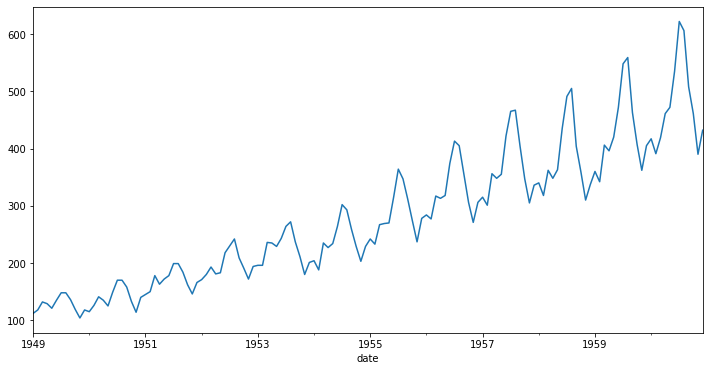

In [73]:
fig, axes = plt.subplots(figsize=(12, 6))
df['value'].plot()
df[]

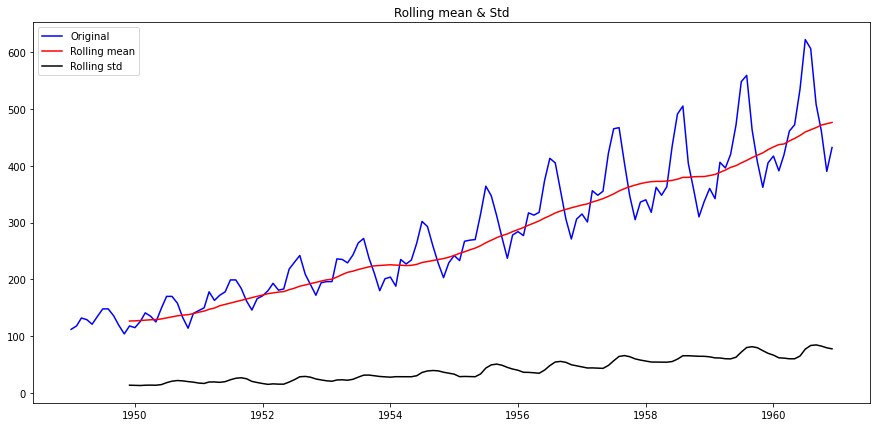

## 3. Comprueba de manera estadística si la serie es o no stationary.

ADF Statistic: 0.8153688792060433
p-value: 0.9918802434376409


## 4. Aplica una transformación logarítmica

## 5. Divide en train y test. Guarda 20 muestras para test.

144
(124,)
(20,)


## 6. Crea tu primer modelo ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-225.738, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-201.351, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-202.849, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-204.251, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.180, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-229.487, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-208.997, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-204.379, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-228.871, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-203.109, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-229.579, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-233.941, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-214.822, Time=0.19 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : 

MSE: 0.02562603831847829
RMSE: 0.16008134906502472
MAE: 0.1401713972444519


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-402.870, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=0.79 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-408.701, Time=1.10 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-382.319, Time=0.49 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-406.713, Time=3.04 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-402.096, Time=1.88 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-404.632, Time=4.29 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.957, Time=1.71 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-382.629, Time=0.29 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-406.922, Time=1.63 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-407.996, Time=3.76 sec
 ARIMA(1,0,2)(1,1,0

MSE: 0.0014484523971820997
RMSE: 0.03805853908365506
MAE: 0.02700906511382741


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  124
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 211.190
Date:                              Tue, 26 Jan 2021   AIC                           -412.379
Time:                                      16:37:44   BIC                           -398.787
Sample:                                           0   HQIC                          -406.864
                                              - 124                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0190      0.010      1.963      0.050    2.63e-05       0.038
ar.L1          0.60

## 7. Representa en una gráfica los datos de test y tus predicciones.

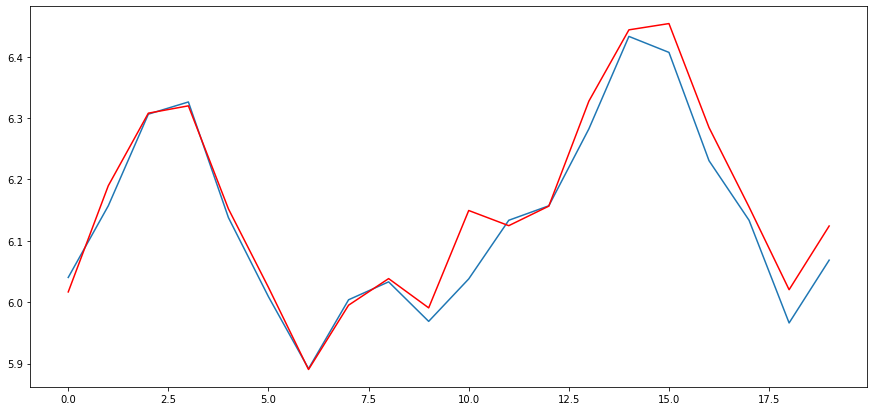

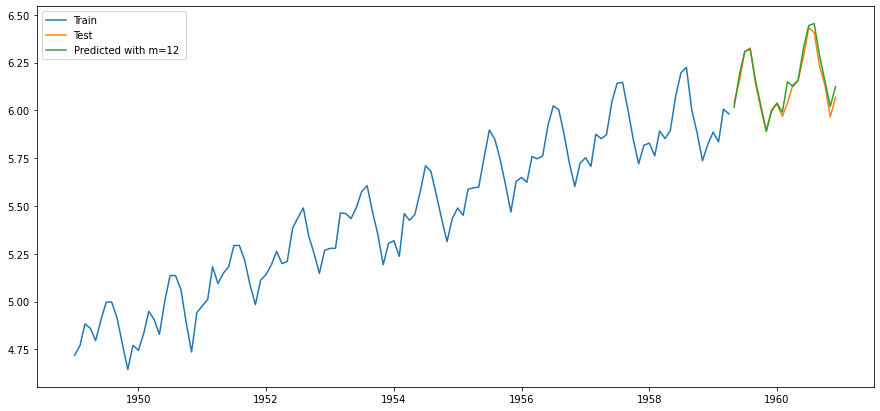

## 8. Prueba otros modelos, a ver qué performance presentan.

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1949-01-01,4.718499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,4.770685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.718499
1949-03-01,4.882802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.718499,4.770685
1949-04-01,4.859812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.718499,4.770685,4.882802
1949-05-01,4.795791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.718499,4.770685,4.882802,4.859812


,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1950-01-01,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275


132

(112, 12)
(20, 12)
(112,)
(20,)


MSE: 0.009566197480872193
RMSE: 0.09780693984003483
MAE: 0.07511556776584269
